# analyse the results of the openai batch


This notebook contains the code to load openai results and analyze them


In [28]:
import os
import json
from IPython.display import Markdown, display, update_display
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
# get api keys
import os

# load environment variables from .env file (requires `python-dotenv`)
from dotenv import load_dotenv

load_dotenv(override=True)



True

In [3]:
# disable langsmith .. no subscription
os.environ["LANGCHAIN_PROJECT"] = "cc1a3_plx_single"
os.environ["LANGSMITH_TRACING"] = 'FALSE'


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import gene_db_classes 
#import gene_db_prompts 

In [6]:
import jsonlines

# load the gene entries into data frames

gene_df
finding_df

In [7]:
batch_result_fpath = 'batch_results/second_pass_results.jsonl'
with jsonlines.open(batch_result_fpath) as reader:
    list_of_gene_entries = [
        json.loads(obj['response']['body']['choices'][0]['message']['content'])
        for obj in reader
    ]
        


In [8]:
list_of_gene_entries

[{'gene_name_or_id': 'infA',
  'locus_tag': 'TX50_RS06200',
  'old_locus_tag': 'PMM1151',
  'protein_id': 'WP_011132784.1',
  'product': 'translation initiation factor IF-1',
  'gene_function': 'The infA gene encodes translation initiation factor IF-1, a key component of prokaryotic protein synthesis machinery. IF-1 binds to the A-site of the 30S ribosomal subunit during translation initiation, facilitating ribosomal subunit dissociation and enhancing the accuracy of start codon selection.',
  'research_findings': [{'finding_category': 'physiological',
    'finding_sub_category': 'photosynthetic protein expression',
    'finding_description': 'Impaired translation initiation reduces expression of photosynthetic proteins, directly compromising light-harvesting efficiency and carbon fixation.',
    'finding_evidence': 'Research on Synechocystis shows that translation factors regulate photosynthetic complex formation.',
    'finding_type': 'physiological impact',
    'url': ['https://pmc.

In [12]:
batch_result_fpath = 'batch_results/second_pass_records.jsonl'
with jsonlines.open(batch_result_fpath, mode='w') as writer:
    writer.write_all(list_of_gene_entries)


In [18]:
list_of_gene_entries[0]['research_findings'][0]

{'finding_category': 'physiological',
 'finding_sub_category': 'photosynthetic protein expression',
 'finding_description': 'Impaired translation initiation reduces expression of photosynthetic proteins, directly compromising light-harvesting efficiency and carbon fixation.',
 'finding_evidence': 'Research on Synechocystis shows that translation factors regulate photosynthetic complex formation.',
 'finding_type': 'physiological impact',
 'url': ['https://pmc.ncbi.nlm.nih.gov/articles/PMC3791720/'],
 'organism': 'Synechocystis',
 'phylogenetic_distance': 'Close',
 'additional_notes': 'While not explicitly studied in Prochlorococcus, the physiological impacts are suggested based on related cyanobacteria.',
 'confidence_score': 3}

In [16]:
gene_df = pd.DataFrame(list_of_gene_entries, columns=['gene_name_or_id', 'locus_tag', 'old_locus_tag', 'protein_id', 'product', 'gene_function',])

In [174]:
def _create_df_for_findings(gene_obj:dict):
    findings_df = pd.DataFrame(gene_obj['research_findings'], )
    findings_df['gene_name_or_id'] = gene_obj['gene_name_or_id']
    findings_df['locus_tag'] = gene_obj['locus_tag']
    return findings_df


finding_df = pd.concat([_create_df_for_findings(i) for i in list_of_gene_entries], ignore_index=True)


# analyze the findings

In [175]:
finding_df.dtypes

finding_category          object
finding_sub_category      object
finding_description       object
finding_evidence          object
finding_type              object
url                       object
organism                  object
phylogenetic_distance     object
additional_notes          object
confidence_score         float64
gene_name_or_id           object
locus_tag                 object
dtype: object

In [176]:
finding_df.head()

,finding_category,finding_sub_category,finding_description,finding_evidence,finding_type,url,organism,phylogenetic_distance,additional_notes,confidence_score,gene_name_or_id,locus_tag
0,physiological,photosynthetic protein expression,Impaired translation initiation reduces expres...,Research on Synechocystis shows that translati...,physiological impact,[https://pmc.ncbi.nlm.nih.gov/articles/PMC3791...,Synechocystis,Close,While not explicitly studied in Prochlorococcu...,3.0,infA,TX50_RS06200
1,stress response,chromatic stress,Paralogous translation initiation factors regu...,Studies in Fremyella diplosiphon reveal potent...,stress response,[https://pmc.ncbi.nlm.nih.gov/articles/PMC3791...,Fremyella diplosiphon,Relevant,No direct evidence links IF-1 to stress respon...,3.0,infA,TX50_RS06200
2,nutrient uptake,none,No evidence suggests IF-1 involvement in nutri...,Cyanobacterial nutrient acquisition relies on ...,nutrient uptake,[https://pmc.ncbi.nlm.nih.gov/articles/PMC1122...,Cyanobacteria,Distant,Nutrient uptake is primarily mediated by speci...,3.0,infA,TX50_RS06200
3,nutrient release,none,No studies associate IF-1 with metabolite rele...,Nutrient excretion in cyanobacteria typically ...,nutrient release,[https://pmc.ncbi.nlm.nih.gov/articles/PMC1122...,Cyanobacteria,Distant,Translation factors play no documented role in...,3.0,infA,TX50_RS06200
4,oxidative stress,none,IF-1 is not directly linked to oxidative stres...,Cyanobacterial oxidative defense primarily inv...,oxidative stress,[https://pmc.ncbi.nlm.nih.gov/articles/PMC1122...,Cyanobacteria,Distant,No explicit mechanisms are documented for IF-1...,3.0,infA,TX50_RS06200


In [177]:
finding_df.columns

Index(['finding_category', 'finding_sub_category', 'finding_description',
       'finding_evidence', 'finding_type', 'url', 'organism',
       'phylogenetic_distance', 'additional_notes', 'confidence_score',
       'gene_name_or_id', 'locus_tag'],
      dtype='object')

In [178]:
corder = [
    'physiological', 
    'stress response', 'oxidative stress', 
    'nutrient exchange', 'nutrient uptake', 'nutrient exudation', 
    'bacterial interaction',       
]

cpalette = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd', '#ccebc5', '#ffed6f']
cpalette = ['#ccebc5','#fb8072',"#e79c93",   '#bc80bd', '#cab2d6',  "#8086d3",  '#fdb462',]
sns.color_palette(cpalette)

[(0.8, 0.9215686274509803, 0.7725490196078432),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.9058823529411765, 0.611764705882353, 0.5764705882352941),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.5019607843137255, 0.5254901960784314, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961)]

In [179]:
porder = ['Direct','Close', 'Relevant', 'Distant',  'none']
ppalette = 'viridis_r'


In [180]:
# unify into a single category column
finding_map = pd.read_csv('finding_map.tsv', sep='\t')
finding_df = pd.merge(finding_df,finding_map, on=['finding_category', 'finding_type'], how='left')
finding_df.drop(columns=['finding_category', 'finding_type'], inplace=True)
finding_df.rename(columns={'final_category': 'finding_category'}, inplace=True)

In [181]:
finding_df.loc[finding_df.finding_sub_category.isin(['oxidative stress']), 'finding_category'] = 'oxidative stress'


In [182]:
# stress subcatergories
finding_df.loc[finding_df.finding_category.isin(['stress response']) ,'sub_category'] = 'other stress'
finding_df.loc[finding_df.finding_category.isin(['stress response']) & finding_df.finding_sub_category.str.contains('nutrient'),'sub_category'] = 'nutrient stress'
finding_df.loc[finding_df.finding_category.isin(['stress response']) & finding_df.finding_sub_category.str.contains('nitrogen'),'sub_category'] = 'nitrogen stress'
finding_df.loc[finding_df.finding_category.isin(['stress response']) & finding_df.finding_sub_category.str.contains('light|irradiance'),'sub_category'] = 'light stress'
finding_df.loc[finding_df.finding_category.isin(['stress response']) & finding_df.finding_sub_category.str.contains('limitation|starvation|scarcity|deficiency'),'sub_category'] = 'nutrient stress'


In [183]:
finding_df.phylogenetic_distance.unique()

array(['Close', 'Relevant', 'Distant', 'Direct', 'none'], dtype=object)

In [184]:
# order the categorical variables
from pandas.api.types import CategoricalDtype

# Define the order of categories
phylogenetic_distance_cat_type = CategoricalDtype(categories=porder, ordered=True)
finding_category_cat_type = CategoricalDtype(categories=corder, ordered=True)

# Convert the column to Categorical with the defined order
finding_df['phylogenetic_distance'] = finding_df['phylogenetic_distance'].astype(phylogenetic_distance_cat_type)
finding_df['finding_category'] = finding_df['finding_category'].astype(finding_category_cat_type)



In [185]:
for column in finding_df.columns:
    if column in ['url']:
        continue
    print(column, finding_df[column].nunique())

finding_sub_category 839
finding_description 2285
finding_evidence 507
organism 137
phylogenetic_distance 5
additional_notes 2235
confidence_score 9
gene_name_or_id 492
locus_tag 503
finding_category 7
sub_category 4


In [186]:
finding_df_drop_duplicates = finding_df.drop_duplicates(['locus_tag', 'finding_category', 'phylogenetic_distance', 'confidence_score'])
finding_df[['locus_tag', 'finding_category', ]].value_counts().head(15)

locus_tag     finding_category  
TX50_RS05080  oxidative stress      3
TX50_RS04790  stress response       3
TX50_RS02260  stress response       3
              physiological         3
TX50_RS04565  stress response       3
              nutrient uptake       3
TX50_RS01150  stress response       3
TX50_RS06795  stress response       3
TX50_RS04160  physiological         3
TX50_RS09140  stress response       3
TX50_RS00645  stress response       3
TX50_RS07260  physiological         3
TX50_RS06945  oxidative stress      2
TX50_RS08670  nutrient exudation    2
TX50_RS07155  oxidative stress      2
Name: count, dtype: int64

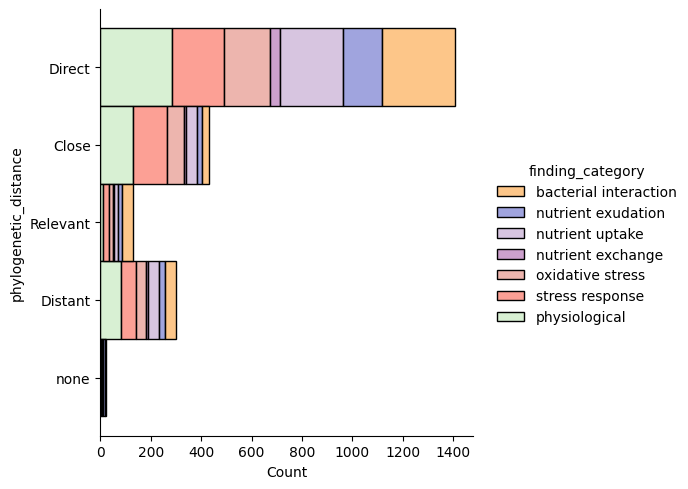

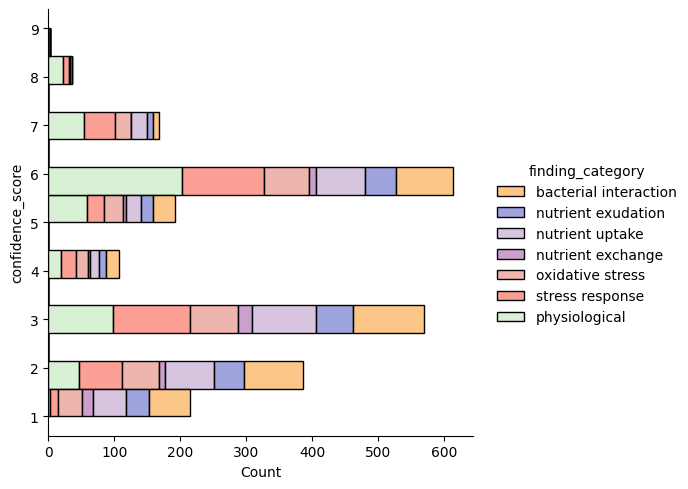

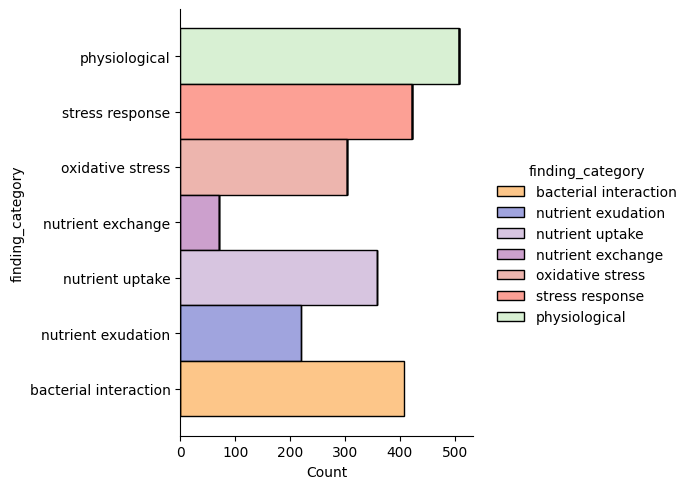

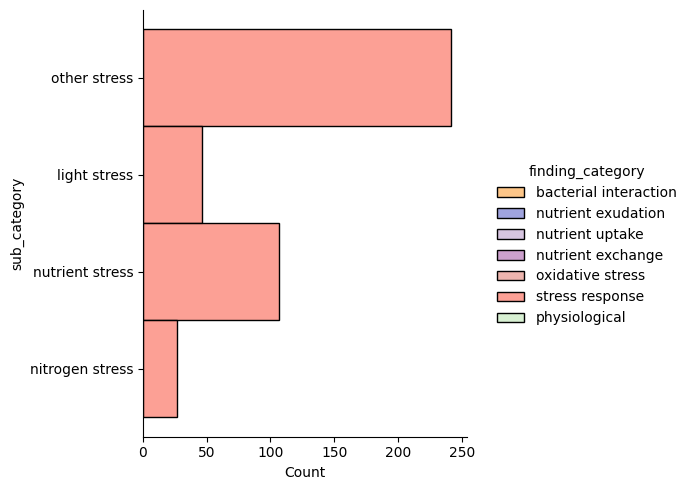

In [187]:
columns_to_skip = [col for col in finding_df.columns if (col == 'url') or (finding_df[col].nunique() > 20)]
for column in finding_df.columns:
    if column in columns_to_skip:
        continue
    
    sns.displot(
        data=finding_df,
        y=column,
        hue='finding_category', multiple='stack',
        hue_order=reversed(corder), palette=reversed(cpalette), 
    )


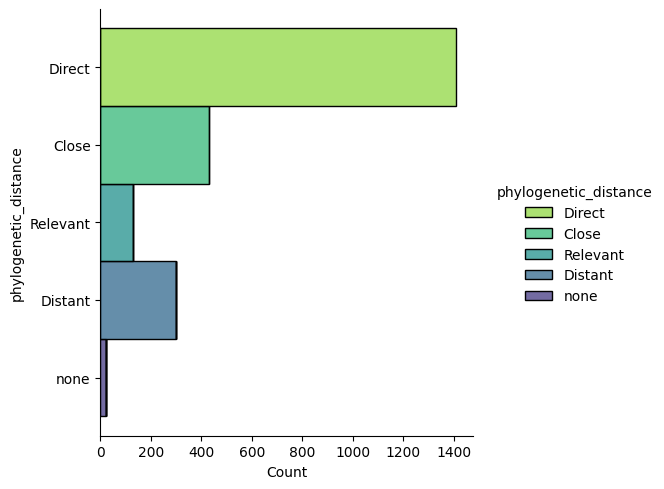

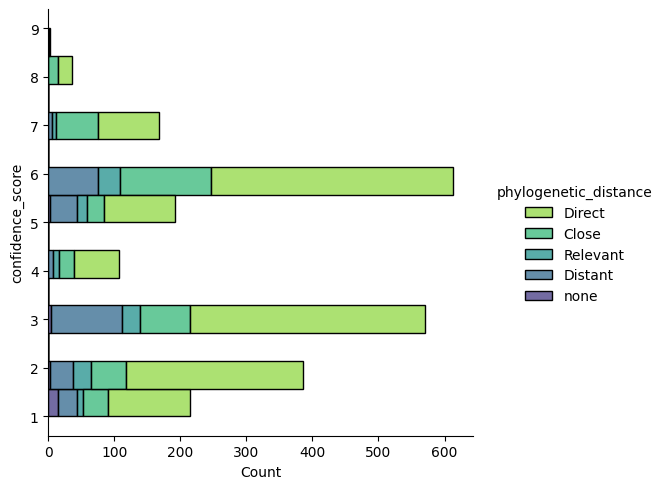

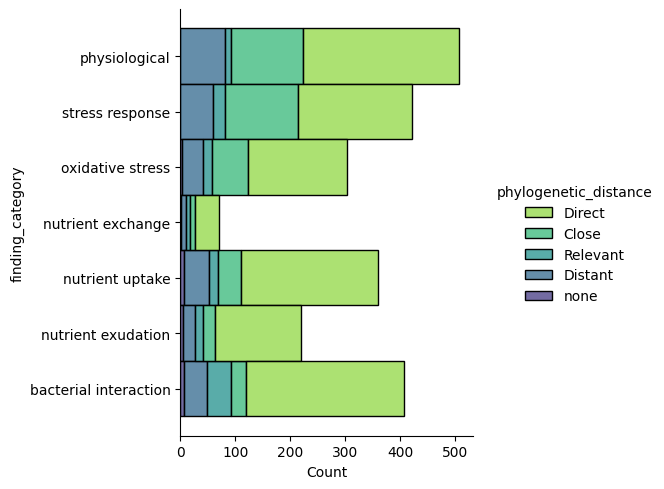

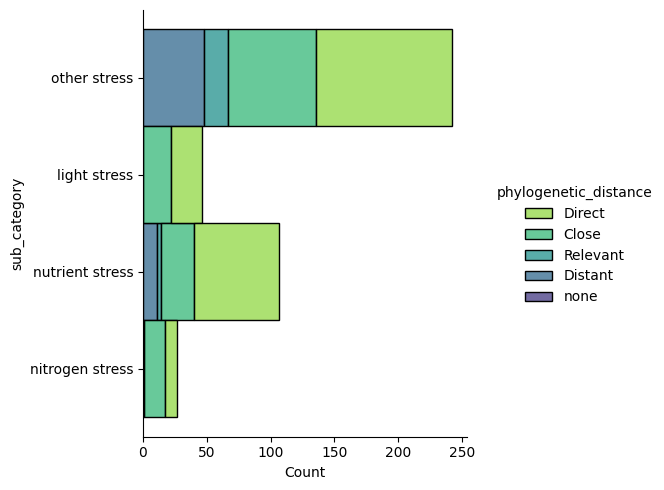

In [188]:
columns_to_skip = [col for col in finding_df.columns if (col == 'url') or (finding_df[col].nunique() > 20)]
for column in finding_df.columns:
    if column in columns_to_skip:
        continue
    
    sns.displot(
        data=finding_df,
        y=column,
        hue='phylogenetic_distance', multiple='stack',
        palette=ppalette,
    )


In [189]:
finding_df.finding_category.value_counts()

finding_category
physiological            508
stress response          422
bacterial interaction    408
nutrient uptake          359
oxidative stress         303
nutrient exudation       220
nutrient exchange         70
Name: count, dtype: int64

In [203]:
finding_df.explode(column='url')

,finding_sub_category,finding_description,finding_evidence,url,organism,phylogenetic_distance,additional_notes,confidence_score,gene_name_or_id,locus_tag,finding_category,sub_category
0,photosynthetic protein expression,Impaired translation initiation reduces expres...,Research on Synechocystis shows that translati...,https://pmc.ncbi.nlm.nih.gov/articles/PMC3791720/,Synechocystis,Close,While not explicitly studied in Prochlorococcu...,3.0,infA,TX50_RS06200,physiological,NaN
1,chromatic stress,Paralogous translation initiation factors regu...,Studies in Fremyella diplosiphon reveal potent...,https://pmc.ncbi.nlm.nih.gov/articles/PMC3791720/,Fremyella diplosiphon,Relevant,No direct evidence links IF-1 to stress respon...,3.0,infA,TX50_RS06200,stress response,other stress
2,none,No evidence suggests IF-1 involvement in nutri...,Cyanobacterial nutrient acquisition relies on ...,https://pmc.ncbi.nlm.nih.gov/articles/PMC11221...,Cyanobacteria,Distant,Nutrient uptake is primarily mediated by speci...,3.0,infA,TX50_RS06200,nutrient uptake,NaN
3,none,No studies associate IF-1 with metabolite rele...,Nutrient excretion in cyanobacteria typically ...,https://pmc.ncbi.nlm.nih.gov/articles/PMC11221...,Cyanobacteria,Distant,Translation factors play no documented role in...,3.0,infA,TX50_RS06200,nutrient exudation,NaN
4,none,IF-1 is not directly linked to oxidative stres...,Cyanobacterial oxidative defense primarily inv...,https://pmc.ncbi.nlm.nih.gov/articles/PMC11221...,Cyanobacteria,Distant,No explicit mechanisms are documented for IF-1...,3.0,infA,TX50_RS06200,oxidative stress,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2285,pyrimidine nucleotide homeostasis,PyrR maintains pyrimidine nucleotide homeostas...,Experimental method is unknown,https://pmc.ncbi.nlm.nih.gov/articles/PMC2415746/,Prochlorococcus MED4,Direct,Regulation optimizes metabolic resource alloca...,3.0,pyrR,TX50_RS07720,physiological,NaN
2286,nitrogen limitation,PyrR-mediated regulation responds to nucleotid...,Experimental method is unknown,https://pmc.ncbi.nlm.nih.gov/articles/PMC10651...,Prochlorococcus MED4,Direct,No direct evidence links PyrR to oxidative str...,3.0,pyrR,TX50_RS07720,stress response,nutrient stress
2287,none,"PyrR does not participate in nutrient uptake, ...",Experimental method is unknown,NaN,Prochlorococcus MED4,Direct,No evidence of membrane transport involvement.,3.0,pyrR,TX50_RS07720,nutrient uptake,NaN
2288,none,No direct role in nutrient exchange identified...,Experimental method is unknown,NaN,Prochlorococcus MED4,Direct,PyrR isn't implicated in nucleotide exchange i...,3.0,pyrR,TX50_RS07720,nutrient exchange,NaN


In [190]:
corder

['physiological',
 'stress response',
 'oxidative stress',
 'nutrient exchange',
 'nutrient uptake',
 'nutrient exudation',
 'bacterial interaction']

In [196]:
finding_df.loc[finding_df.finding_category.isin(['nutrient uptake']),['sub_category',]].value_counts()


Series([], Name: count, dtype: int64)

In [198]:
finding_df.loc[finding_df.finding_category.isin(['nutrient uptake'])]['finding_sub_category'].str.split(' ', expand=True)[0].value_counts().head(40)

0
none                112
unknown              45
nitrogen             24
indirect             19
nutrient             15
iron                 10
carbon               10
amino                 9
phosphate             7
urea                  6
ammonium              6
not                   5
arginine              4
glucose               4
histidine             3
energy                3
CO₂                   2
membrane              2
thiamine              2
tryptophan            2
energy-dependent      2
riboflavin            2
acetate               2
LPS                   2
cobalt                2
intracellular         2
biotin                2
cobalamin             2
folate                2
exogenous             2
organic               2
sulfate               2
maltodextrin          1
copper-iron           1
p-aminobenzoate       1
cross-feeding         1
tRNA                  1
purine                1
lactate               1
malonyl-CoA           1
Name: count, dtype: int64

In [201]:
finding_df.loc[finding_df.finding_category.isin(['nutrient uptake'])].sort_values('confidence_score',ascending=False).head(5).T


,811,1903,445,813,422
finding_sub_category,glucose metabolism,phosphate uptake,urea uptake,glucose utilization,carbon assimilation
finding_description,Glk activity directly influences cellular ener...,PstS exclusively mediates phosphate uptake via...,UrtE exclusively facilitates urea uptake via t...,Glk enables intracellular glucose utilization ...,Controlling inorganic carbon assimilation thro...
finding_evidence,gene expression analysis (RT-PCR),experimental method is unknown,Kinetic studies confirm ATP-dependent urea imp...,gene expression analysis (RT-PCR),Experimental method is unknown
url,[https://pmc.ncbi.nlm.nih.gov/articles/PMC2565...,[https://www.moore.org/MMIRAPSTNTPosters/Jamie...,[https://pmc.ncbi.nlm.nih.gov/articles/PMC6603...,[https://pmc.ncbi.nlm.nih.gov/articles/PMC2565...,[https://www.frontiersin.org/journals/plant-sc...
organism,Prochlorococcus,Prochlorococcus MED4,Prochlorococcus,Prochlorococcus,Prochlorococcus MED4
phylogenetic_distance,Direct,Direct,Direct,Direct,Direct
additional_notes,Glk is conserved across Prochlorococcus clades...,This high-affinity system dominates Pi acquisi...,No evidence suggests involvement in nutrient r...,This may facilitate cross-feeding in coculture...,Potential modulation of nitrogen metabolism th...
confidence_score,9.0,8.0,8.0,8.0,7.0
gene_name_or_id,glk,pstS,urtE,glk,ftsH
locus_tag,TX50_RS03175,TX50_RS03790,TX50_RS05180,TX50_RS03175,TX50_RS01165


In [172]:
finding_df.loc[finding_df.finding_category.isin(['stress response']) & finding_df.finding_sub_category.str.contains('limitation|starvation|scarcity|deficiency'),'finding_sub_category'].value_counts()
# finding_df.loc[finding_df.finding_category.isin(['stress response']) & finding_df.finding_sub_category.str.contains('iron'),'finding_sub_category'].value_counts()


Series([], Name: count, dtype: int64)

In [149]:
finding_df.loc[finding_df.finding_category.isin(['oxidative stress']),'finding_sub_category'].value_counts().head(20)


finding_sub_category
oxidative stress                      106
none                                   63
unknown                                21
ROS management                         11
not applicable                          4
DNA repair                              4
reactive oxygen species                 4
ROS scavenging                          4
oxidative stress response               3
oxidative stress management             3
ROS production                          3
DNA damage repair                       3
indirect contribution                   3
ROS detoxification                      2
ROS regulation                          2
ROS defense                             2
reactive oxygen species management      2
H₂O₂ production                         2
arsenic-induced oxidative stress        2
ROS generation                          2
Name: count, dtype: int64

# URLs

url_df = finding_df.explode(colun)

In [204]:
url_df = finding_df.explode(column='url')
url_df

,finding_sub_category,finding_description,finding_evidence,url,organism,phylogenetic_distance,additional_notes,confidence_score,gene_name_or_id,locus_tag,finding_category,sub_category
0,photosynthetic protein expression,Impaired translation initiation reduces expres...,Research on Synechocystis shows that translati...,https://pmc.ncbi.nlm.nih.gov/articles/PMC3791720/,Synechocystis,Close,While not explicitly studied in Prochlorococcu...,3.0,infA,TX50_RS06200,physiological,NaN
1,chromatic stress,Paralogous translation initiation factors regu...,Studies in Fremyella diplosiphon reveal potent...,https://pmc.ncbi.nlm.nih.gov/articles/PMC3791720/,Fremyella diplosiphon,Relevant,No direct evidence links IF-1 to stress respon...,3.0,infA,TX50_RS06200,stress response,other stress
2,none,No evidence suggests IF-1 involvement in nutri...,Cyanobacterial nutrient acquisition relies on ...,https://pmc.ncbi.nlm.nih.gov/articles/PMC11221...,Cyanobacteria,Distant,Nutrient uptake is primarily mediated by speci...,3.0,infA,TX50_RS06200,nutrient uptake,NaN
3,none,No studies associate IF-1 with metabolite rele...,Nutrient excretion in cyanobacteria typically ...,https://pmc.ncbi.nlm.nih.gov/articles/PMC11221...,Cyanobacteria,Distant,Translation factors play no documented role in...,3.0,infA,TX50_RS06200,nutrient exudation,NaN
4,none,IF-1 is not directly linked to oxidative stres...,Cyanobacterial oxidative defense primarily inv...,https://pmc.ncbi.nlm.nih.gov/articles/PMC11221...,Cyanobacteria,Distant,No explicit mechanisms are documented for IF-1...,3.0,infA,TX50_RS06200,oxidative stress,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2285,pyrimidine nucleotide homeostasis,PyrR maintains pyrimidine nucleotide homeostas...,Experimental method is unknown,https://pmc.ncbi.nlm.nih.gov/articles/PMC2415746/,Prochlorococcus MED4,Direct,Regulation optimizes metabolic resource alloca...,3.0,pyrR,TX50_RS07720,physiological,NaN
2286,nitrogen limitation,PyrR-mediated regulation responds to nucleotid...,Experimental method is unknown,https://pmc.ncbi.nlm.nih.gov/articles/PMC10651...,Prochlorococcus MED4,Direct,No direct evidence links PyrR to oxidative str...,3.0,pyrR,TX50_RS07720,stress response,nutrient stress
2287,none,"PyrR does not participate in nutrient uptake, ...",Experimental method is unknown,NaN,Prochlorococcus MED4,Direct,No evidence of membrane transport involvement.,3.0,pyrR,TX50_RS07720,nutrient uptake,NaN
2288,none,No direct role in nutrient exchange identified...,Experimental method is unknown,NaN,Prochlorococcus MED4,Direct,PyrR isn't implicated in nucleotide exchange i...,3.0,pyrR,TX50_RS07720,nutrient exchange,NaN


In [206]:
url_df.url.value_counts().head(30)

url
https://pmc.ncbi.nlm.nih.gov/articles/PMC8066212/                                                                 46
https://www.pnas.org/doi/10.1073/pnas.0711165105                                                                  43
https://pmc.ncbi.nlm.nih.gov/articles/PMC7133116/                                                                 39
https://www.pnas.org/doi/10.1073/pnas.1519220112                                                                  35
https://www.frontiersin.org/journals/microbiology/articles/10.3389/fmicb.2013.00246/full                          34
https://academic.oup.com/femsre/article/39/3/301/2467840                                                          31
https://en.wikipedia.org/wiki/Cyanobacteria                                                                       28
https://www.science.org/doi/10.1126/sciadv.adl6428                                                                26
https://pmc.ncbi.nlm.nih.gov/articles/PMC6737895/           

In [207]:
citation_bibtex_dpath = 'batch_results/citations'


In [211]:
from urllib.parse import urlparse
def _get_domain(x):
    try:
        return urlparse(x).netloc
    except:
        return np.nan
    
url_df['domain'] = url_df.url.apply(lambda x: _get_domain(x))



In [214]:
url_df.loc[url_df.domain.isna()].url

17      NaN
21      NaN
22      NaN
23      NaN
28      NaN
       ... 
2283    NaN
2284    NaN
2287    NaN
2288    NaN
2289    NaN
Name: url, Length: 851, dtype: object

In [218]:
url_df[['url','domain']].value_counts(dropna=False).reset_index().domain.value_counts().head(30)

domain
pmc.ncbi.nlm.nih.gov              252
pubmed.ncbi.nlm.nih.gov            91
www.frontiersin.org                54
www.pnas.org                       53
journals.asm.org                   45
academic.oup.com                   41
doi.org                            20
onlinelibrary.wiley.com            18
www.uniprot.org                    15
journals.plos.org                  15
www.microbiologyresearch.org        9
www.mdpi.com                        7
dspace.mit.edu                      6
www.science.org                     5
en.wikipedia.org                    5
pubs.acs.org                        4
www.embopress.org                   4
febs.onlinelibrary.wiley.com        4
elifesciences.org                   4
ouci.dntb.gov.ua                    4
www.bohrium.com                     3
string-db.org                       3
www.tandfonline.com                 3
escholarship.org                    3
www.caister.com                     2
portlandpress.com                   2
royal